# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [ ]:
from aitlas.datasets import AmazonRainforestDataset
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTranspose
from aitlas.utils import image_loader

## Visualize images and masks

Total number of patches: 30


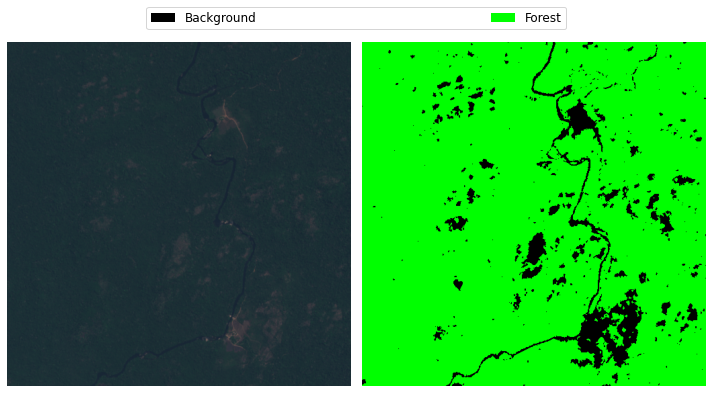

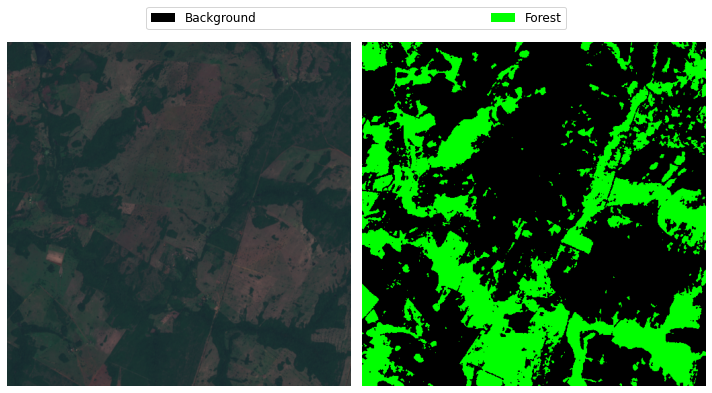

In [2]:
dataset_config = {
    "data_dir": "../data/AmazonForest/Training"
}
dataset = AmazonRainforestDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(10);
dataset.show_image(26);

In [3]:
dataset.data_distribution_table()

,Number of pixels
Background,3654658.0
Forest,4203929.0


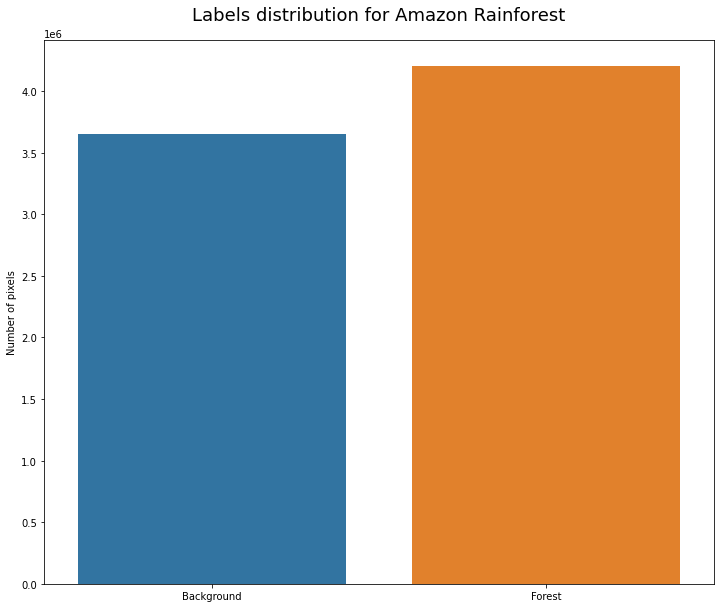

In [4]:
dataset.data_distribution_barchart();

## Load train data

In [5]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "../data/AmazonForest/Training",
    "joint_transforms": ["aitlas.transforms.FlipHVRandomRotate"],
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = AmazonRainforestDataset(train_dataset_config)

len(train_dataset)

30

## Create the model

In [6]:
epochs = 50
model_directory = "./experiments/amazon_rainforest"
model_config = {
    "num_classes": 2, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [8]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2022-10-30 13:40:03,565 INFO Starting training.
training: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.28s/it]
2022-10-30 13:40:06,172 INFO epoch: 1, time: 3, loss:  0.69170
testing on train set: 100%|███████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.79it/s]
2022-10-30 13:40:08,492 INFO IOU:0.44783788953154396, IOU mean:0.44338572522774344, IOU per Class:[0.46143023 0.42534122]
training: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.02s/it]
2022-10-30 13:40:10,544 INFO epoch: 2, time: 2, loss:  0.62310
testing on train set: 100%|███████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.79it/s]
2022-10-30 13:40:11,692 INFO IOU:0.4706076995545176, IOU mean:0.4710052422452734, IOU per Class:[0.46945916 0.47255133]
training: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:

training: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.03s/it]
2022-10-30 13:42:09,881 INFO epoch: 39, time: 2, loss:  0.21214
testing on train set: 100%|███████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.78it/s]
2022-10-30 13:42:11,031 INFO IOU:0.9134928691327082, IOU mean:0.9131289192496281, IOU per Class:[0.90708307 0.91917477]
training: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.01it/s]
2022-10-30 13:42:13,018 INFO epoch: 40, time: 2, loss:  0.22206
testing on train set: 100%|███████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]
2022-10-30 13:42:14,213 INFO IOU:0.9104907990097474, IOU mean:0.90990560402661, IOU per Class:[0.90255077 0.91726044]
training: 100%|███████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.03s/it]
2022-10-30 13:42:16,282 INFO 

## Evalute the model using test data

In [7]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "../data/AmazonForest/Validation",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = AmazonRainforestDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "./experiments/amazon_rainforest/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2022-10-30 19:26:10,490 INFO Loading checkpoint ./experiments/amazon_rainforest/checkpoint.pth.tar
2022-10-30 19:26:11,070 INFO Loaded checkpoint ./experiments/amazon_rainforest/checkpoint.pth.tar at epoch 51
testing on test set: 100%|████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.04it/s]


[{'IOU': 0.8720902532434759,
  'IOU mean': 0.8719951877410451,
  'IOU per Class': array([0.8760762 , 0.86791418])}]

## Predictions

2022-10-30 13:43:19,178 INFO Loading checkpoint ./experiments/amazon_rainforest/checkpoint.pth.tar
2022-10-30 13:43:19,564 INFO Loaded checkpoint ./experiments/amazon_rainforest/checkpoint.pth.tar at epoch 51


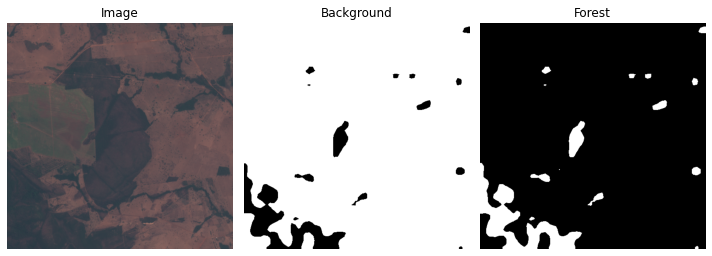

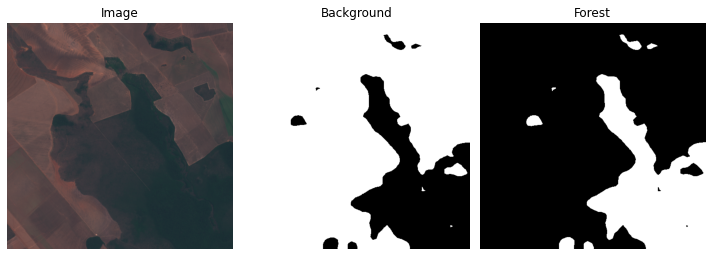

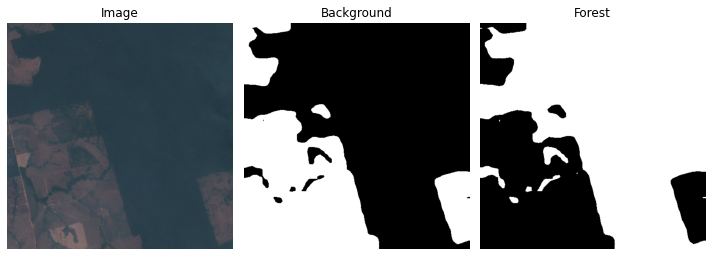

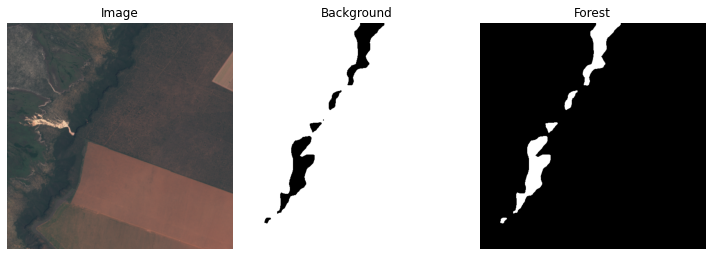

In [10]:
model_path = "./experiments/amazon_rainforest/checkpoint.pth.tar"
#labels = AmazonRainforestDataset.labels
labels = ["Background", "Forest"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('../data/AmazonForest/Test/7.tiff')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/AmazonForest/Test/6.tiff')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/AmazonForest/Test/0.tiff')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/AmazonForest/Test/4.tiff')
fig = model.predict_masks(image, labels, transform)